# Homework 4

Taylor Poole

---

In [197]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, RepeatedKFold

# One-time install and activation of improved PDF
# export template
import template_install

## Question 1

In [162]:
import oscillator as oscil

ossim = oscil.simulation()
ossim


,time,length
0,0.00,1.496200
1,0.01,1.495450
2,0.02,1.493204
3,0.03,1.489474
4,0.04,1.484282
5,0.05,1.477659
6,0.06,1.469643
7,0.07,1.460281
8,0.08,1.449626
9,0.09,1.437742


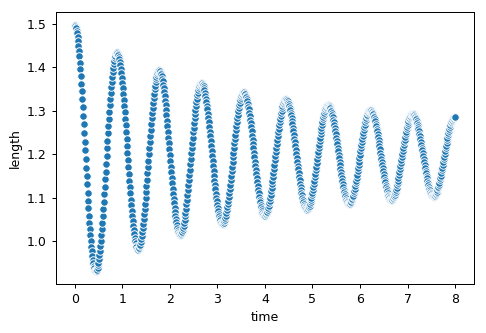

In [163]:
fig, ax = plt.subplots(dpi=90)
sns.scatterplot(x="time", y="length", data=ossim, ax=ax);

In [164]:
ossim_df_poly=ossim.copy()

In [165]:
for n in np.arange(2,4):
    ossim_df_poly[f"time**{n}"] = ossim_df_poly["time"]**n

In [166]:
ossim_df_poly.head()

,time,length,time**2,time**3
0,0.00,1.496200,0.0000,0.000000
1,0.01,1.495450,0.0001,0.000001
2,0.02,1.493204,0.0004,0.000008
3,0.03,1.489474,0.0009,0.000027
4,0.04,1.484282,0.0016,0.000064


In [167]:
lm=LinearRegression()

In [168]:
independent_var = "length"
dependent_vars = ["time", "time**2", "time**3"]


In [169]:
ossim_fit=lm.fit(X=ossim_df_poly[dependent_vars], y=ossim_df_poly[independent_var])

In [170]:
ossim_fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
pd.DataFrame({
    "coefficient": ["beta_0", "beta_1", "beta_2", "beta_3"],
    "value": np.concatenate([[ossim_fit.intercept_], ossim_fit.coef_]),
})

,coefficient,value
0,beta_0,1.214366
1,beta_1,-0.018700
2,beta_2,0.004719
3,beta_3,-0.000339


In [172]:
ossim_predict_df = pd.DataFrame({
    "x": np.arange(-9, -3, 0.01),
    "x**2": np.arange(-9, -3, 0.01) ** 2,
    "x**3": np.arange(-9, -3, 0.01) ** 3,
})
ossim_predict_df["y"] = ossim_fit.predict(ossim_predict_df)

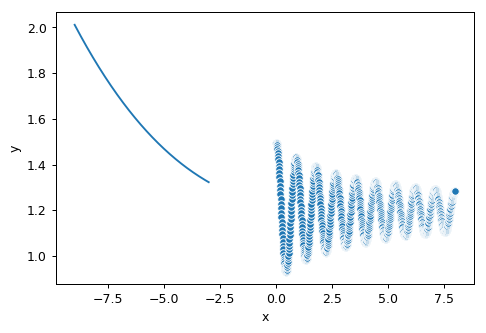

In [173]:
fig, ax = plt.subplots(dpi=90)
sns.scatterplot(x="time", y="length", data=ossim, ax=ax)
sns.lineplot(x="x", y="y", data=ossim_predict_df, ax=ax);

In [174]:
for n in np.arange(4, 16):
    ossim_df_poly[f"time**{n}"]=ossim_df_poly["time"] ** n

In [175]:
ossim_df_poly.head()

,time,length,time**2,time**3,time**4,time**5,time**6,time**7,time**8,time**9,time**10,time**11,time**12,time**13,time**14,time**15
0,0.00,1.496200,0.0000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.01,1.495450,0.0001,0.000001,1.000000e-08,1.000000e-10,1.000000e-12,1.000000e-14,1.000000e-16,1.000000e-18,1.000000e-20,1.000000e-22,1.000000e-24,1.000000e-26,1.000000e-28,1.000000e-30
2,0.02,1.493204,0.0004,0.000008,1.600000e-07,3.200000e-09,6.400000e-11,1.280000e-12,2.560000e-14,5.120000e-16,1.024000e-17,2.048000e-19,4.096000e-21,8.192000e-23,1.638400e-24,3.276800e-26
3,0.03,1.489474,0.0009,0.000027,8.100000e-07,2.430000e-08,7.290000e-10,2.187000e-11,6.561000e-13,1.968300e-14,5.904900e-16,1.771470e-17,5.314410e-19,1.594323e-20,4.782969e-22,1.434891e-23
4,0.04,1.484282,0.0016,0.000064,2.560000e-06,1.024000e-07,4.096000e-09,1.638400e-10,6.553600e-12,2.621440e-13,1.048576e-14,4.194304e-16,1.677722e-17,6.710886e-19,2.684355e-20,1.073742e-21


In [182]:
independent_var = "length"
dependent_vars= ["time"]

ossim_pol_predict_df = pd.DataFrame({
    "time": np.arange(0, 5, 8),
})

for n in range(1, 16):
    if n > 1:
        dependent_vars.append(f"time**{n}")
        ossim_pol_predict_df[f"time**{n}"] = \
            np.arange(0, 5, 8) ** n
        
    ossim_polyfit = lm.fit(
        X=ossim_df_poly[dependent_vars],
        y=ossim_df_poly[independent_var],
    )
    ossim_pol_predict_df[f"{n}"] = \
        ossim_polyfit.predict(ossim_pol_predict_df[dependent_vars])

In [183]:
ossim_pol_predict_df_reshaped = ossim_pol_predict_df \
    .melt(id_vars=dependent_vars,
          value_vars=[f"{n}" for n in range(1, 16)],
          var_name="Degree",
          value_name="y_predicted")

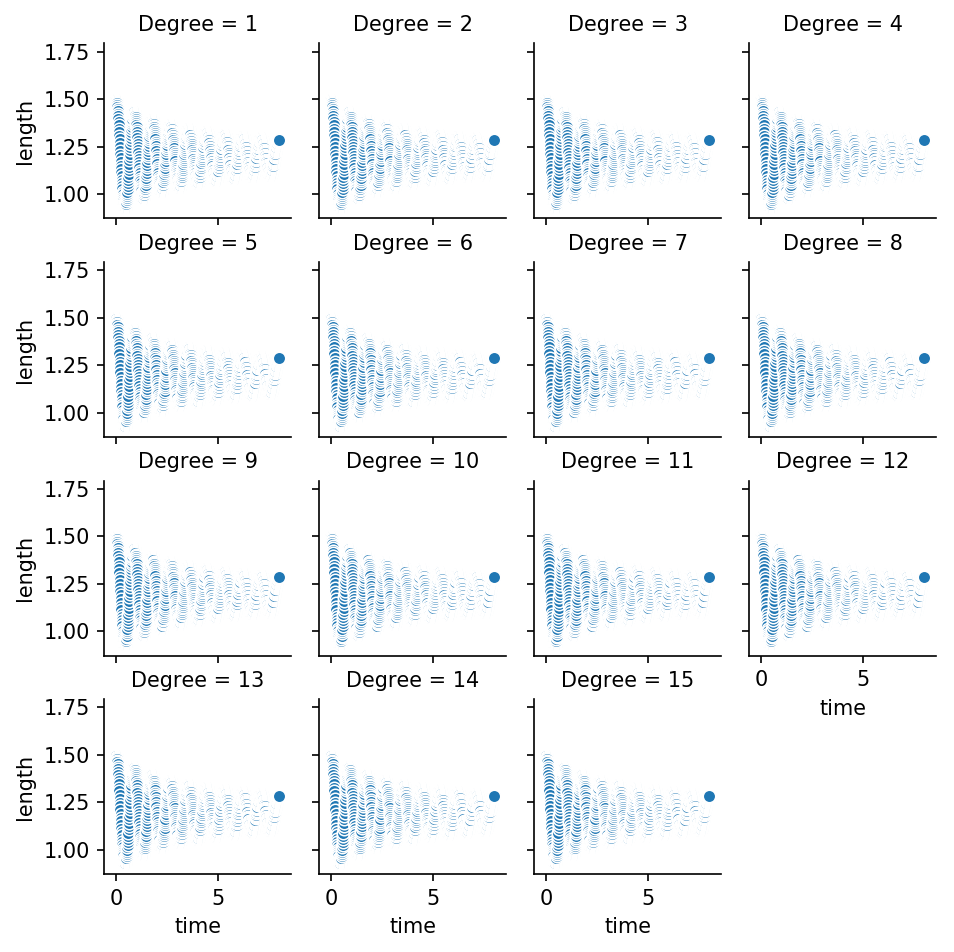

In [187]:
fmap = sns.FacetGrid(
    ossim_pol_predict_df_reshaped,
    col="Degree",
    col_wrap=4,
    col_order=[f"{n}" for n in range(1, 16)],
    hue_kws={"color": ["k"]},
    sharex=True,
    sharey=True,
)

# Plots the predicted values as black lines
fmap = fmap.map(plt.plot, "time", "y_predicted")

# Plots the data points within each facet
for idx in range(15):
    sns.scatterplot(x="time", y="length", data=ossim_df_poly, ax=fmap.axes[idx])

fmap.fig.set_dpi(150)
fmap.fig.set_size_inches(6, 6)

In [188]:
##Cross Validation
independent_var = "length"
dependent_vars = ["time"]

ossim_poly_cv_scores = {
    "n": [],
    "mse": [],
    "mse_sd": [],
    "r**2": [],
    "r**2_sd": [],
}

for n in range(1, 16):
    if n > 1:
        dependent_vars.append(f"time**{n}")
        
    rkf = RepeatedKFold(
        n_splits=10,
        n_repeats=100,
        random_state=int(np.round(np.random.uniform(0, 2**31), decimals=0)),
    )
    
    # Cross-validated mean-squared error score
    mse_cv_score = cross_val_score(
        lm,
        ossim_df_poly[dependent_vars],
        ossim_df_poly[independent_var],
        scoring="neg_mean_squared_error",
        cv=rkf,
        n_jobs=-1,  # Use all processors during cross-validation run
    )

    # Cross-validated R**2 score
    r2_cv_score = cross_val_score(
        lm,
        ossim_df_poly[dependent_vars],
        ossim_df_poly[independent_var],
        scoring="r2",
        cv=rkf,
        n_jobs=-1,  # Use all processors during cross-validation run
    )

    ossim_poly_cv_scores["n"].append(n)
    ossim_poly_cv_scores["mse"].append(-np.mean(mse_cv_score))  # Get rid of negative sign
    ossim_poly_cv_scores["mse_sd"].append(np.std(mse_cv_score))
    ossim_poly_cv_scores["r**2"].append(np.mean(r2_cv_score))
    ossim_poly_cv_scores["r**2_sd"].append(np.std(r2_cv_score))

# Convert dictionary to data frame
ossim_poly_cv_scores_df = pd.DataFrame(ossim_poly_cv_scores)

In [189]:
ossim_poly_cv_scores_df

,n,mse,mse_sd,r**2,r**2_sd
0,1,0.013619,0.001656,-0.017910,0.023398
1,2,0.013656,0.001693,-0.021044,0.025510
2,3,0.013688,0.001708,-0.022690,0.026787
3,4,0.013647,0.001655,-0.019940,0.035148
4,5,0.013634,0.001650,-0.020062,0.040726
5,6,0.013286,0.001641,0.005446,0.060756
6,7,0.013170,0.001615,0.013529,0.072657
7,8,0.012401,0.001497,0.069189,0.088188
8,9,0.012189,0.001471,0.084312,0.087634
9,10,0.011475,0.001357,0.138005,0.084536


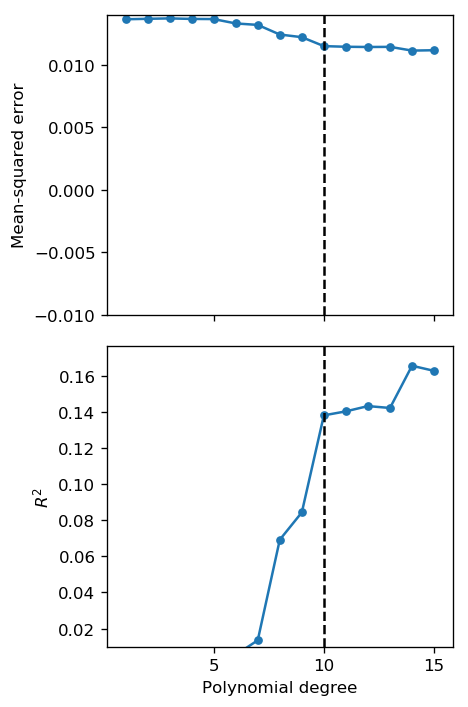

In [196]:
fig, ax = plt.subplots(nrows=2, dpi=120, figsize=(4, 6), sharex=True)
sns.scatterplot(x="n", y="mse", data=ossim_poly_cv_scores_df, ax=ax[0])
sns.lineplot(x="n", y="mse", data=ossim_poly_cv_scores_df, ax=ax[0])
ax[0].axvline(x=10, linestyle="--", color="k")  # "True" polynomial degree
ax[0].set_ylim([-0.01, 0.014])
ax[0].set_xlabel(r"Polynomial degree")
ax[0].set_ylabel(r"Mean-squared error")

sns.scatterplot(x="n", y="r**2", data=ossim_poly_cv_scores_df, ax=ax[1])
sns.lineplot(x="n", y="r**2", data=ossim_poly_cv_scores_df, ax=ax[1])
ax[1].axvline(x=10, linestyle="--", color="k")  # "True" polynomial degree
ax[1].set_ylim([-0.17, 0.01][1])
ax[1].set_xlabel(r"Polynomial degree")
ax[1].set_ylabel(r"$R^{2}$")

fig.tight_layout();

In [14]:
q2=oscil.simulation(delta_t=0.1)
q2

,time,length
0,0.0,1.496200
1,0.1,1.419372
2,0.2,1.232876
3,0.3,1.039346
4,0.4,0.936415
5,0.5,0.966820
6,0.6,1.111615
7,0.7,1.291888
8,0.8,1.413755
9,0.9,1.422018


## Question 2

In [233]:
import dayton

In [234]:
dayton.download_data()

In [238]:
dayton_df=dayton.make_temperature_df()

SyntaxError: invalid syntax (<ipython-input-238-c3487691c3aa>, line 1)

In [ ]:
Washington=np.sin( dayton_df["WA"] )

In [ ]:
Utah=np.sin( dayton_df["UT"] )